In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
!pip install kneed

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/mjohantito/DataRumah_DM3Nov/main/Property_Dataset_-_Clustering_-_Data_Rumah-2.csv")
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,NaN,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area Category                  307 non-null    object 
 1   Nama Daerah                    307 non-null    object 
 2   Luas Tanah (m2)                307 non-null    float64
 3   Luas Bangunan (m2)             307 non-null    float64
 4   Jumlah Kamar                   307 non-null    float64
 5   Jumlah Kamar Mandi             306 non-null    float64
 6   Tingkat/Lantai                 306 non-null    float64
 7   Harga Penawaran (dari Owner)   307 non-null    object 
 8   Terjual/Belum                  307 non-null    object 
 9   Arah Hadap Rumah               225 non-null    object 
 10  Posisi Rumah                   192 non-null    object 
 11  Lebar Jalan Depan Rumah (ROW)  266 non-null    object 
dtypes: float64(5), object(7)
memory usage: 29.0+ KB


In [4]:
df.isnull().sum()

Area Category                      1
Nama Daerah                        1
Luas Tanah (m2)                    1
Luas Bangunan (m2)                 1
Jumlah Kamar                       1
Jumlah Kamar Mandi                 2
Tingkat/Lantai                     2
Harga Penawaran (dari Owner)       1
Terjual/Belum                      1
Arah Hadap Rumah                  83
Posisi Rumah                     116
Lebar Jalan Depan Rumah (ROW)     42
dtype: int64

In [5]:
df = df.dropna(subset=['Area Category'])
df.isnull().sum()

Area Category                      0
Nama Daerah                        0
Luas Tanah (m2)                    0
Luas Bangunan (m2)                 0
Jumlah Kamar                       0
Jumlah Kamar Mandi                 1
Tingkat/Lantai                     1
Harga Penawaran (dari Owner)       0
Terjual/Belum                      0
Arah Hadap Rumah                  82
Posisi Rumah                     115
Lebar Jalan Depan Rumah (ROW)     41
dtype: int64

In [6]:
df = df.dropna(subset=['Jumlah Kamar Mandi'])
df.isnull().sum()

Area Category                      0
Nama Daerah                        0
Luas Tanah (m2)                    0
Luas Bangunan (m2)                 0
Jumlah Kamar                       0
Jumlah Kamar Mandi                 0
Tingkat/Lantai                     1
Harga Penawaran (dari Owner)       0
Terjual/Belum                      0
Arah Hadap Rumah                  81
Posisi Rumah                     114
Lebar Jalan Depan Rumah (ROW)     40
dtype: int64

In [7]:
df = df.dropna(subset=['Tingkat/Lantai '])
df.isnull().sum()

Area Category                      0
Nama Daerah                        0
Luas Tanah (m2)                    0
Luas Bangunan (m2)                 0
Jumlah Kamar                       0
Jumlah Kamar Mandi                 0
Tingkat/Lantai                     0
Harga Penawaran (dari Owner)       0
Terjual/Belum                      0
Arah Hadap Rumah                  80
Posisi Rumah                     113
Lebar Jalan Depan Rumah (ROW)     39
dtype: int64

In [8]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df.iloc[:,:] = imputer.fit_transform(df)
df.head(5)

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil
5,Premium,Kenjeran,450.0,530.0,5.0,6.0,2.0,10800000000,Belum,Utara,Standard,1-2 Mobil


In [9]:
df['Harga Penawaran (dari Owner)'].unique

<bound method Series.unique of 1        287799000
2       2699999999
3       3100000000
4       5000000000
5      10800000000
          ...     
303      450000000
304     5250000000
305     1950000000
306     1550000000
307     5000000000
Name: Harga Penawaran (dari Owner), Length: 305, dtype: object>

In [10]:
df = df[df['Harga Penawaran (dari Owner)'] != " "]
df

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil
5,Premium,Kenjeran,450.0,530.0,5.0,6.0,2.0,10800000000,Belum,Utara,Standard,1-2 Mobil
...,...,...,...,...,...,...,...,...,...,...,...,...
303,Standard,Gununganyar,47.0,34.0,2.0,1.0,1.0,450000000,Belum,Utara,Standard,> 2 Mobil
304,Sangat Premium,Sukolilo,300.0,212.0,4.0,4.0,1.0,5250000000,Belum,Selatan,Standard,1-2 Mobil
305,Premium,Mulyorejo,102.0,156.0,4.0,2.0,2.0,1950000000,Belum,Selatan,Standard,1-2 Mobil
306,Standard,Sukolilo,98.0,170.0,4.0,3.0,2.0,1550000000,Belum,Utara,Standard,> 2 Mobil


In [11]:
df.dtypes

Area Category                     object
Nama Daerah                       object
Luas Tanah (m2)                  float64
Luas Bangunan (m2)               float64
Jumlah Kamar                     float64
Jumlah Kamar Mandi               float64
Tingkat/Lantai                   float64
Harga Penawaran (dari Owner)      object
Terjual/Belum                     object
Arah Hadap Rumah                  object
Posisi Rumah                      object
Lebar Jalan Depan Rumah (ROW)     object
dtype: object

In [12]:
df.isnull().sum()

Area Category                    0
Nama Daerah                      0
Luas Tanah (m2)                  0
Luas Bangunan (m2)               0
Jumlah Kamar                     0
Jumlah Kamar Mandi               0
Tingkat/Lantai                   0
Harga Penawaran (dari Owner)     0
Terjual/Belum                    0
Arah Hadap Rumah                 0
Posisi Rumah                     0
Lebar Jalan Depan Rumah (ROW)    0
dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Arah Hadap Rumah'] = le.fit_transform(df['Arah Hadap Rumah'])
df['Posisi Rumah'] = le.fit_transform(df['Posisi Rumah'])
df['Lebar Jalan Depan Rumah (ROW)'] = le.fit_transform(df['Lebar Jalan Depan Rumah (ROW)'])
df['Area Category'] = le.fit_transform(df['Area Category'])
df['Nama Daerah'] = le.fit_transform(df['Nama Daerah'])
#df['Luas Tanah (m2)'] = le.fit_transform(df['Luas Tanah (m2)'])
#df['Luas Bangunan (m2)'] = le.fit_transform(df['Luas Bangunan (m2)'])
#df['Jumlah Kamar'] = le.fit_transform(df['Jumlah Kamar'])
#df['Jumlah Kamar Mandi'] = le.fit_transform(df['Jumlah Kamar Mandi'])
#df['Tingkat/Lantai '] = le.fit_transform(df['Tingkat/Lantai '])
#df['Harga Penawaran (dari Owner)'] = le.fit_transform(df['Harga Penawaran (dari Owner)'])
df['Terjual/Belum'] = le.fit_transform(df['Terjual/Belum'])
df=df
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
1,0,99,30.0,60.0,2.0,1.0,2.0,287799000,0,3,2,1
2,3,48,170.0,170.0,5.0,4.0,2.0,2699999999,0,1,0,0
3,2,48,187.0,250.0,5.0,5.0,2.0,3100000000,0,3,2,0
4,1,48,350.0,600.0,5.0,5.0,2.0,5000000000,0,0,2,0
5,1,48,450.0,530.0,5.0,6.0,2.0,10800000000,0,3,2,0


In [14]:
df.dtypes

Area Category                      int64
Nama Daerah                        int64
Luas Tanah (m2)                  float64
Luas Bangunan (m2)               float64
Jumlah Kamar                     float64
Jumlah Kamar Mandi               float64
Tingkat/Lantai                   float64
Harga Penawaran (dari Owner)      object
Terjual/Belum                      int64
Arah Hadap Rumah                   int64
Posisi Rumah                       int64
Lebar Jalan Depan Rumah (ROW)      int64
dtype: object

In [15]:
df = df[df['Harga Penawaran (dari Owner)'] != " "]
df

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
1,0,99,30.0,60.0,2.0,1.0,2.0,287799000,0,3,2,1
2,3,48,170.0,170.0,5.0,4.0,2.0,2699999999,0,1,0,0
3,2,48,187.0,250.0,5.0,5.0,2.0,3100000000,0,3,2,0
4,1,48,350.0,600.0,5.0,5.0,2.0,5000000000,0,0,2,0
5,1,48,450.0,530.0,5.0,6.0,2.0,10800000000,0,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
303,3,32,47.0,34.0,2.0,1.0,1.0,450000000,0,3,2,2
304,2,104,300.0,212.0,4.0,4.0,1.0,5250000000,0,1,2,0
305,1,72,102.0,156.0,4.0,2.0,2.0,1950000000,0,1,2,0
306,3,104,98.0,170.0,4.0,3.0,2.0,1550000000,0,3,2,2


In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
standardized_data = sc.fit_transform(df)
standardized_data

array([[-1.67853911,  1.04528669, -0.97337797, ...,  0.84472593,
        -0.18934585,  0.216733  ],
       [ 1.01184343, -0.35468954, -0.28197209, ..., -1.13063317,
        -5.42217668, -0.82908973],
       [ 0.11504925, -0.35468954, -0.19801566, ...,  0.84472593,
        -0.18934585, -0.82908973],
       ...,
       [-0.78174493,  0.3041228 , -0.6177978 , ..., -1.13063317,
        -0.18934585, -0.82908973],
       [ 1.01184343,  1.18253926, -0.63755225, ...,  0.84472593,
        -0.18934585,  1.26255574],
       [-1.67853911,  1.51194544, -0.16838398, ...,  0.84472593,
        -0.18934585,  1.26255574]])

In [17]:
standardized_df = pd.DataFrame(standardized_data, columns=['Area Category','Nama Daerah','Luas Tanah (m2)','Luas Bangunan (m2)','Jumlah Kamar','Jumlah Kamar Mandi','Tingkat/Lantai ','Harga Penawaran (dari Owner)','Terjual/Belum','Arah Hadap Rumah','Posisi Rumah','Lebar Jalan Depan Rumah (ROW)'])
standardized_df.head(5)

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,-1.678539,1.045287,-0.973378,-0.970857,-1.381918,-1.434497,0.281912,-0.567429,0.0,0.844726,-0.189346,0.216733
1,1.011843,-0.354690,-0.281972,-0.456512,0.436710,0.405533,0.281912,-0.278272,0.0,-1.130633,-5.422177,-0.829090
2,0.115049,-0.354690,-0.198016,-0.082443,0.436710,1.018876,0.281912,-0.230323,0.0,0.844726,-0.189346,-0.829090
3,-0.781745,-0.354690,0.606978,1.554110,0.436710,1.018876,0.281912,-0.002565,0.0,-2.118313,-0.189346,-0.829090
4,-0.781745,-0.354690,1.100840,1.226800,0.436710,1.632220,0.281912,0.692697,0.0,0.844726,-0.189346,-0.829090


In [18]:
from sklearn import preprocessing
import pandas as pd
d = preprocessing.normalize(df, axis=0)
scaled_df = pd.DataFrame(d, columns=['Area Category','Nama Daerah','Luas Tanah (m2)','Luas Bangunan (m2)','Jumlah Kamar','Jumlah Kamar Mandi','Tingkat/Lantai ','Harga Penawaran (dari Owner)','Terjual/Belum','Arah Hadap Rumah','Posisi Rumah','Lebar Jalan Depan Rumah (ROW)'])
scaled_df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,0.000000,0.079993,0.005655,0.010045,0.025010,0.015436,0.059589,0.001695,0.0,0.072548,0.054433,0.046176
1,0.078975,0.038784,0.032046,0.028461,0.062524,0.061743,0.059589,0.015904,0.0,0.024183,0.000000,0.000000
2,0.052650,0.038784,0.035250,0.041854,0.062524,0.077179,0.059589,0.018260,0.0,0.072548,0.054433,0.000000
3,0.026325,0.038784,0.065977,0.100449,0.062524,0.077179,0.059589,0.029452,0.0,0.000000,0.054433,0.000000
4,0.026325,0.038784,0.084827,0.088730,0.062524,0.092615,0.059589,0.063616,0.0,0.072548,0.054433,0.000000


In [19]:
from sklearn.cluster import KMeans
X = standardized_data
wcss = [] #within cluster sum of square


# check the inertia for each K
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, max_iter = 100, n_init = 5, random_state=42)
    kmeans.fit(standardized_data)
    wcss.append(kmeans.inertia_)

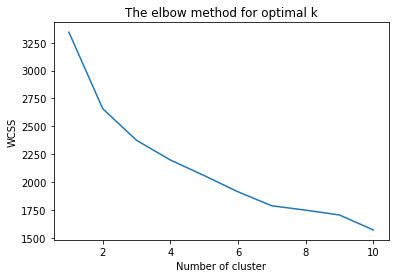

In [20]:
plt.plot(range(1,11), wcss)
plt.title('The elbow method for optimal k')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

In [21]:
from kneed import KneeLocator
kn = KneeLocator(range(1,11),wcss, curve='convex', direction='decreasing')
print('the optimal k is ',kn.knee)

the optimal k is  3


In [22]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 100, n_init = 5, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X)

In [23]:
y_kmeans

array([2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1,
       1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 1, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 2, 2, 2, 1, 2, 0, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1,
       2, 0, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 0, 2, 2, 1, 1, 0, 2, 1, 1, 2, 2, 2,
       2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 0, 2, 2, 2, 0, 0, 1, 0, 2, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 0, 2, 2, 0,
       1, 2, 0, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 2, 2, 2, 1, 2, 1,
       1, 1, 0, 1, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2,
       1, 0, 1, 1, 1, 2, 1, 0, 2, 0, 2, 1, 2, 2, 2,

In [24]:
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
1,0,99,30.0,60.0,2.0,1.0,2.0,287799000,0,3,2,1
2,3,48,170.0,170.0,5.0,4.0,2.0,2699999999,0,1,0,0
3,2,48,187.0,250.0,5.0,5.0,2.0,3100000000,0,3,2,0
4,1,48,350.0,600.0,5.0,5.0,2.0,5000000000,0,0,2,0
5,1,48,450.0,530.0,5.0,6.0,2.0,10800000000,0,3,2,0


In [25]:
df['KMeans_Clusters'] = y_kmeans

df.groupby("KMeans_Clusters").agg(Area_Category = ('Area Category',pd.Series.mode),
                                 Nama_Daerah = ('Nama Daerah',pd.Series.mode),
                                 Luas_Tanah = ('Luas Tanah (m2)', 'mean'),
                                 Luas_Bangunan = ('Luas Bangunan (m2)','mean'),
                                 Jumlah_Kamar = ('Jumlah Kamar','mean'),
                                 Jumlah_Kamar_Mandi = ('Jumlah Kamar Mandi','mean'),
                                 Tingkat_Lantai = ('Tingkat/Lantai ','mean'),
                                 Harga_Penawaran = ('Harga Penawaran (dari Owner)','mean'),
                                 Terjual_Belum = ('Terjual/Belum',pd.Series.mode),
                                 Arah_Hadap_Rumah = ('Arah Hadap Rumah',pd.Series.mode),
                                 Posisi_Rumah = ('Posisi Rumah',pd.Series.mode),
                                 Lebar_Jalan_Depan_Rumah = ('Lebar Jalan Depan Rumah (ROW)',pd.Series.mode),
                                 Count = ("KMeans_Clusters",'count'))

,Area_Category,Nama_Daerah,Luas_Tanah,Luas_Bangunan,Jumlah_Kamar,Jumlah_Kamar_Mandi,Tingkat_Lantai,Harga_Penawaran,Terjual_Belum,Arah_Hadap_Rumah,Posisi_Rumah,Lebar_Jalan_Depan_Rumah,Count
KMeans_Clusters,,,,,,,,,,,,,
0,2,11,609.909091,652.704545,6.295455,5.250000,1.920455,inf,0,3,2,2,44
1,1,11,209.703704,279.288889,4.888889,3.925926,2.074074,inf,0,"[1, 3]",2,0,135
2,3,11,111.128000,119.496000,2.912000,2.032000,1.596000,inf,0,3,2,0,125


# Hierarical Cluster

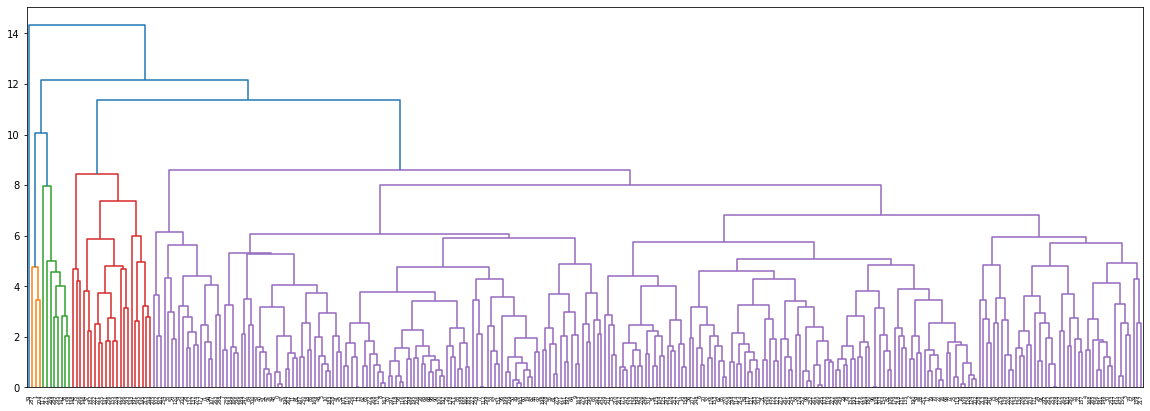

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(20,7))
linkage_data = linkage(X, method='complete')
dendrogram(linkage_data)
plt.show()

In [39]:
from sklearn.cluster import AgglomerativeClustering

hierarchical_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
labels = hierarchical_cluster.fit_predict(X)
labels

array([0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,

In [40]:
df['hierarchical_cluster'] = labels

df.groupby("hierarchical_cluster").agg(Area_Category = ('Area Category',pd.Series.mode),
                                 Nama_Daerah = ('Nama Daerah',pd.Series.mode),
                                 Luas_Tanah = ('Luas Tanah (m2)', 'mean'),
                                 Luas_Bangunan = ('Luas Bangunan (m2)','mean'),
                                 Jumlah_Kamar = ('Jumlah Kamar','mean'),
                                 Jumlah_Kamar_Mandi = ('Jumlah Kamar Mandi','mean'),
                                 Tingkat_Lantai = ('Tingkat/Lantai ','mean'),
                                 Harga_Penawaran = ('Harga Penawaran (dari Owner)','mean'),
                                 Terjual_Belum = ('Terjual/Belum',pd.Series.mode),
                                 Arah_Hadap_Rumah = ('Arah Hadap Rumah',pd.Series.mode),
                                 Posisi_Rumah = ('Posisi Rumah',pd.Series.mode),
                                 Lebar_Jalan_Depan_Rumah = ('Lebar Jalan Depan Rumah (ROW)',pd.Series.mode),
                                 Count = ("hierarchical_cluster",'count'))

,Area_Category,Nama_Daerah,Luas_Tanah,Luas_Bangunan,Jumlah_Kamar,Jumlah_Kamar_Mandi,Tingkat_Lantai,Harga_Penawaran,Terjual_Belum,Arah_Hadap_Rumah,Posisi_Rumah,Lebar_Jalan_Depan_Rumah,Count
hierarchical_cluster,,,,,,,,,,,,,
0,3,11,218.613014,249.623288,4.167808,3.219178,1.833904,inf,0,3,2,0,292
1,3,30,600.000000,600.000000,7.000000,5.000000,1.000000,9.900000e+10,0,0,2,0,1
2,"[2, 3]","[1, 11, 16, 19, 28, 30, 34, 37, 42, 48, 62]",418.363636,715.454545,7.000000,6.363636,2.500000,2.454545e+114,0,3,2,0,11


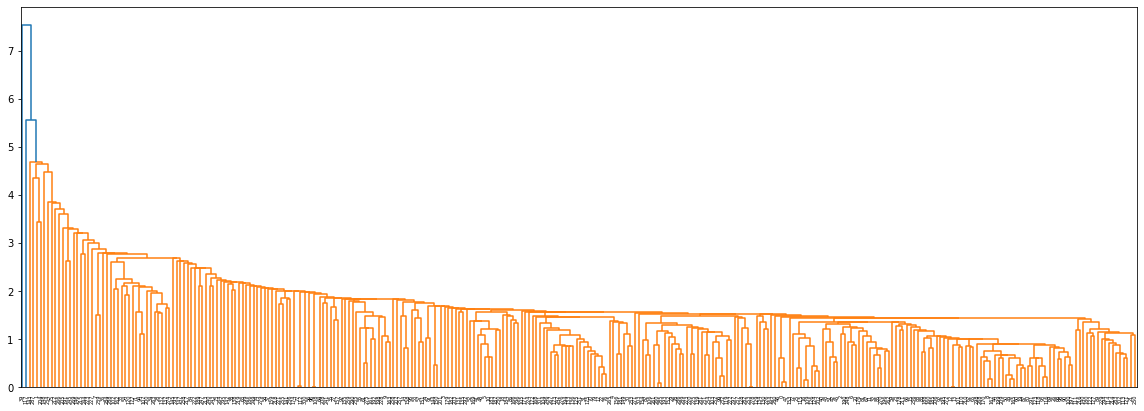

In [38]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(20,7))
linkage_data = linkage(X, method='single')
dendrogram(linkage_data)
plt.show()

In [41]:
from sklearn.cluster import AgglomerativeClustering

hierarchical_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
labels = hierarchical_cluster.fit_predict(X)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [42]:
df['hierarchical_cluster'] = labels

df.groupby("hierarchical_cluster").agg(Area_Category = ('Area Category',pd.Series.mode),
                                 Nama_Daerah = ('Nama Daerah',pd.Series.mode),
                                 Luas_Tanah = ('Luas Tanah (m2)', 'mean'),
                                 Luas_Bangunan = ('Luas Bangunan (m2)','mean'),
                                 Jumlah_Kamar = ('Jumlah Kamar','mean'),
                                 Jumlah_Kamar_Mandi = ('Jumlah Kamar Mandi','mean'),
                                 Tingkat_Lantai = ('Tingkat/Lantai ','mean'),
                                 Harga_Penawaran = ('Harga Penawaran (dari Owner)','mean'),
                                 Terjual_Belum = ('Terjual/Belum',pd.Series.mode),
                                 Arah_Hadap_Rumah = ('Arah Hadap Rumah',pd.Series.mode),
                                 Posisi_Rumah = ('Posisi Rumah',pd.Series.mode),
                                 Lebar_Jalan_Depan_Rumah = ('Lebar Jalan Depan Rumah (ROW)',pd.Series.mode),
                                 Count = ("hierarchical_cluster",'count'))

,Area_Category,Nama_Daerah,Luas_Tanah,Luas_Bangunan,Jumlah_Kamar,Jumlah_Kamar_Mandi,Tingkat_Lantai,Harga_Penawaran,Terjual_Belum,Arah_Hadap_Rumah,Posisi_Rumah,Lebar_Jalan_Depan_Rumah,Count
hierarchical_cluster,,,,,,,,,,,,,
0,3,11,225.817881,266.258278,4.241722,3.301325,1.857616,inf,0,3,2,0,302
1,3,30,600.000000,600.000000,7.000000,5.000000,1.000000,9.900000e+10,0,0,2,0,1
2,3,42,240.000000,350.000000,13.000000,13.000000,2.000000,2.750000e+09,0,1,2,2,1


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(20,7))
linkage_data = linkage(X, method='ward')
dendrogram(linkage_data)
plt.show()

In [43]:
from sklearn.cluster import AgglomerativeClustering

hierarchical_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(X)
labels

array([0, 1, 0, 1, 1, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 2, 2, 2,
       0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0,
       0, 1, 1, 0, 0, 1, 2, 2, 0, 2, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 2, 2, 2, 1, 2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0, 2, 1, 0, 1, 2, 2, 1,
       0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 2, 0, 0, 1, 0, 1, 2, 0, 0, 2, 0,

In [44]:
df['hierarchical_cluster'] = labels

df.groupby("hierarchical_cluster").agg(Area_Category = ('Area Category',pd.Series.mode),
                                 Nama_Daerah = ('Nama Daerah',pd.Series.mode),
                                 Luas_Tanah = ('Luas Tanah (m2)', 'mean'),
                                 Luas_Bangunan = ('Luas Bangunan (m2)','mean'),
                                 Jumlah_Kamar = ('Jumlah Kamar','mean'),
                                 Jumlah_Kamar_Mandi = ('Jumlah Kamar Mandi','mean'),
                                 Tingkat_Lantai = ('Tingkat/Lantai ','mean'),
                                 Harga_Penawaran = ('Harga Penawaran (dari Owner)','mean'),
                                 Terjual_Belum = ('Terjual/Belum',pd.Series.mode),
                                 Arah_Hadap_Rumah = ('Arah Hadap Rumah',pd.Series.mode),
                                 Posisi_Rumah = ('Posisi Rumah',pd.Series.mode),
                                 Lebar_Jalan_Depan_Rumah = ('Lebar Jalan Depan Rumah (ROW)',pd.Series.mode),
                                 Count = ("hierarchical_cluster",'count'))

,Area_Category,Nama_Daerah,Luas_Tanah,Luas_Bangunan,Jumlah_Kamar,Jumlah_Kamar_Mandi,Tingkat_Lantai,Harga_Penawaran,Terjual_Belum,Arah_Hadap_Rumah,Posisi_Rumah,Lebar_Jalan_Depan_Rumah,Count
hierarchical_cluster,,,,,,,,,,,,,
0,3,11,169.959596,215.121212,4.156566,3.287879,2.000000,inf,0,3,2,0,198
1,1,11,532.400000,607.927273,6.236364,5.145455,2.027273,inf,0,3,2,0,55
2,3,"[11, 111]",119.666667,104.509804,2.647059,1.588235,1.107843,inf,0,3,2,0,51


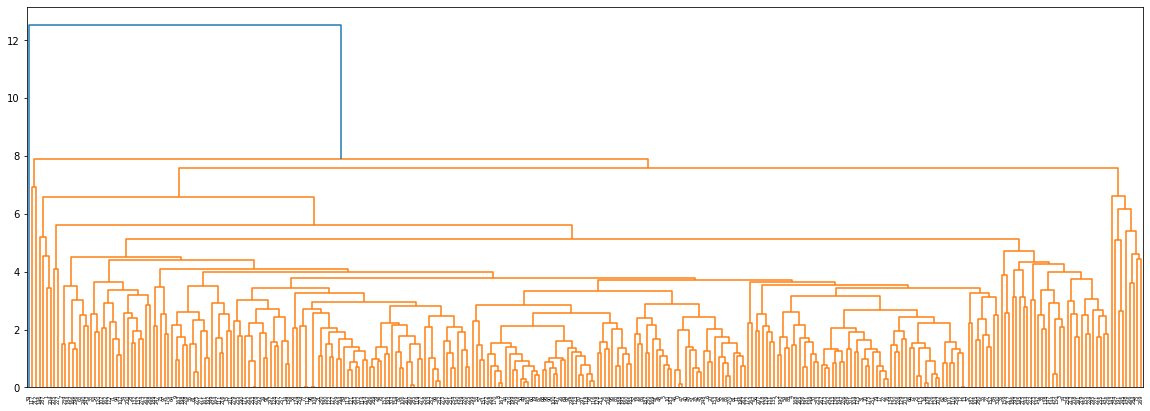

In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(20,7))
linkage_data = linkage(X, method='average')
dendrogram(linkage_data)
plt.show()

In [45]:
from sklearn.cluster import AgglomerativeClustering

hierarchical_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
labels = hierarchical_cluster.fit_predict(X)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [46]:
df['hierarchical_cluster'] = labels

df.groupby("hierarchical_cluster").agg(Area_Category = ('Area Category',pd.Series.mode),
                                 Nama_Daerah = ('Nama Daerah',pd.Series.mode),
                                 Luas_Tanah = ('Luas Tanah (m2)', 'mean'),
                                 Luas_Bangunan = ('Luas Bangunan (m2)','mean'),
                                 Jumlah_Kamar = ('Jumlah Kamar','mean'),
                                 Jumlah_Kamar_Mandi = ('Jumlah Kamar Mandi','mean'),
                                 Tingkat_Lantai = ('Tingkat/Lantai ','mean'),
                                 Harga_Penawaran = ('Harga Penawaran (dari Owner)','mean'),
                                 Terjual_Belum = ('Terjual/Belum',pd.Series.mode),
                                 Arah_Hadap_Rumah = ('Arah Hadap Rumah',pd.Series.mode),
                                 Posisi_Rumah = ('Posisi Rumah',pd.Series.mode),
                                 Lebar_Jalan_Depan_Rumah = ('Lebar Jalan Depan Rumah (ROW)',pd.Series.mode),
                                 Count = ("hierarchical_cluster",'count'))

,Area_Category,Nama_Daerah,Luas_Tanah,Luas_Bangunan,Jumlah_Kamar,Jumlah_Kamar_Mandi,Tingkat_Lantai,Harga_Penawaran,Terjual_Belum,Arah_Hadap_Rumah,Posisi_Rumah,Lebar_Jalan_Depan_Rumah,Count
hierarchical_cluster,,,,,,,,,,,,,
0,3,11,225.471761,264.651163,4.229236,3.285714,1.850498,inf,0,3,2,0,301
1,3,30,600.000000,600.000000,7.000000,5.000000,1.000000,9.900000e+10,0,0,2,0,1
2,"[2, 3]","[1, 42]",285.000000,550.000000,10.500000,10.500000,3.000000,1.375000e+19,0,"[1, 3]",2,"[0, 2]",2
